In [1238]:
from pandas_datareader import data as pdr

import yfinance as yf
 
df = yf.download(tickers='BMW.DE', period='730d', interval='1h')

#df = yf.download(tickers = 'CL=F', start = '2021-03-11',end = '2022-07-10',interval='1h')

[*********************100%%**********************]  1 of 1 completed


In [1239]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-04-21 09:00:00+02:00,86.500000,86.559998,85.129997,85.540001,85.540001,124883
2021-04-21 10:00:00+02:00,85.449997,85.769997,85.129997,85.519997,85.519997,402717
2021-04-21 11:00:00+02:00,85.260002,85.550003,84.800003,84.809998,84.809998,273664
2021-04-21 12:00:00+02:00,85.160004,85.309998,84.660004,85.309998,85.309998,218870
2021-04-21 13:00:00+02:00,84.860001,85.349998,84.839996,84.870003,84.870003,154168
...,...,...,...,...,...,...
2024-02-21 17:00:00+01:00,104.220001,104.379997,104.160004,104.260002,104.260002,57303
2024-02-22 09:00:00+01:00,105.000000,107.080002,104.980003,105.739998,105.739998,183223
2024-02-22 10:00:00+01:00,105.760002,105.980003,105.440002,105.820000,105.820000,52656


In [1240]:
import pandas as pd
import pandas_ta as ta

# Assuming df is your DataFrame containing OHLCV data
# Make sure your DataFrame has columns like 'Open', 'High', 'Low', 'Close', 'Volume'

# Filter out rows with zero volume
df = df[df['Volume'] != 0]

# Convert the DataFrame index to datetime (assuming your index represents timestamps)
df.index = pd.to_datetime(df.index)

# Extract date and time features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Minute'] = df.index.minute

# Assuming your DataFrame index is in UTC, you might want to convert it to the timezone relevant for the European market
# Example:
# df = df.tz_localize('UTC').tz_convert('Europe/Paris')
# Reset the index without adding the previous index as a new column
df.reset_index(drop=True, inplace=True)

# Now the DataFrame will have a default integer index without the previous index as a column

# Calculate RSI with a length of 14
df['RSI'] = ta.rsi(df['Close'], length=14).fillna(method='bfill')

# Calculate EMA with a length of 4
df['EMA'] = ta.ema(df['Close'], length=4).fillna(method='bfill')

# Optionally, you might want to resample the data to 1-hour timeframe
# Example:
# df = df.resample('1H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum', 'RSI': 'last', 'EMA': 'last'})

# Note: The resampling approach may vary depending on how you want to handle the OHLCV data

# Now you can use the modified DataFrame for further analysis or visualization
df


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\172582216.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\172582216.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\172582216.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA
0,86.500000,86.559998,85.129997,85.540001,85.540001,124883,2021,4,21,9,0,58.890876,85.294998
1,85.449997,85.769997,85.129997,85.519997,85.519997,402717,2021,4,21,10,0,58.890876,85.294998
2,85.260002,85.550003,84.800003,84.809998,84.809998,273664,2021,4,21,11,0,58.890876,85.294998
3,85.160004,85.309998,84.660004,85.309998,85.309998,218870,2021,4,21,12,0,58.890876,85.294998
4,84.860001,85.349998,84.839996,84.870003,84.870003,154168,2021,4,21,13,0,58.890876,85.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,104.220001,104.379997,104.160004,104.260002,104.260002,57303,2024,2,21,17,0,68.344587,104.076814
5914,105.000000,107.080002,104.980003,105.739998,105.739998,183223,2024,2,22,9,0,78.420484,104.742088
5915,105.760002,105.980003,105.440002,105.820000,105.820000,52656,2024,2,22,10,0,78.813064,105.173252
5916,105.800003,106.080002,105.660004,106.000000,106.000000,59493,2024,2,22,11,0,79.707560,105.503951


In [1241]:
EMAsignal = [0]*len(df)
backcandles = 15

for row in range(backcandles, len(df)):
    upt = 1
    dnt = 1
    for i in range(row-backcandles, row+1):
        if max(df.Open[i], df.Close[i])>=df.EMA[i]:
            dnt=0
        if min(df.Open[i], df.Close[i])<=df.EMA[i]:
            upt=0
    if upt==1 and dnt==1:
        EMAsignal[row]=3
    elif upt==1:
        EMAsignal[row]=2
    elif dnt==1:
        EMAsignal[row]=1

df['EMASignal'] = EMAsignal

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\3269106155.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1242]:
def isPivot(candle, window):
    """
    function that detects if a candle is a pivot/fractal point
    args: candle index, window before and after candle to test if pivot
    returns: 1 if pivot high, 2 if pivot low, 3 if both and 0 default
    """
    if candle-window < 0 or candle+window >= len(df):
        return 0
    
    pivotHigh = 1
    pivotLow = 2
    for i in range(candle-window, candle+window+1):
        if df.iloc[candle].Low > df.iloc[i].Low:
            pivotLow=0
        if df.iloc[candle].High < df.iloc[i].High:
            pivotHigh=0
    if (pivotHigh and pivotLow):
        return 3
    elif pivotHigh:
        return pivotHigh
    elif pivotLow:
        return pivotLow
    else:
        return 0

In [1243]:
window=5
df['isPivot'] = df.apply(lambda x: isPivot(x.name,window), axis=1)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\1837583093.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1244]:
def pointpos(x):
    if x['isPivot']==2:
        return x['Low']-1e-3
    elif x['isPivot']==1:
        return x['High']+1e-3
    else:
        return np.nan
df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\250927464.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1245]:
dfpl = df
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [1246]:
def detect_structure(candle, backcandles, window):
    """
    Attention! window should always be greater than the pivot window! to avoid look ahead bias
    """
    localdf = df[candle-backcandles-window:candle-window]  
    highs = localdf[localdf['isPivot'] == 1].High.tail(3).values
    idxhighs = localdf[localdf['isPivot'] == 1].High.tail(3).index
    lows = localdf[localdf['isPivot'] == 2].Low.tail(3).values
    idxlows = localdf[localdf['isPivot'] == 2].Low.tail(3).index

    pattern_detected = False

    lim1 = 0.005
    lim2 = lim1/3
    if len(highs) == 3 and len(lows) == 3:
        order_condition = (idxlows[0] < idxhighs[0] 
                           < idxlows[1] < idxhighs[1] 
                           < idxlows[2] < idxhighs[2])
        diff_condition = ( 
                            abs(lows[0]-highs[0])>lim1 and 
                            abs(highs[0]-lows[1])>lim2 and
                            abs(highs[1]-lows[1])>lim1 and
                            abs(highs[1]-lows[2])>lim2
                            )
        pattern_1 = (lows[0] < highs[0] and
            lows[1] > lows[0] and lows[1] < highs[0] and
            highs[1] > highs[0] and
            lows[2] > lows[1] and lows[2] < highs[1] and
            highs[2] < highs[1] and highs[2] > lows[2]
            )

        pattern_2 = (lows[0] < highs[0] and
            lows[1] > lows[0] and lows[1] < highs[0] and
            highs[1] > highs[0] and
            lows[2] < lows[1] and
            highs[2] < highs[1] 
            )

        if (order_condition and
            diff_condition and
            (pattern_1 or pattern_2)
        ):
            pattern_detected = True

    if pattern_detected:
        return 1
    else:
        return 0

In [1247]:
df['CHOCH_pattern_detected'] = df.index.map(lambda x: detect_structure(x, backcandles=40, window=6))

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\2957290366.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1248]:
df[df['CHOCH_pattern_detected']!=0]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected
139,83.830002,84.059998,83.739998,83.879997,83.879997,71812,2021,5,12,13,0,49.149390,83.874338,0,0,NaN,1
369,93.279999,93.510002,92.519997,92.690002,92.690002,67022,2021,6,18,9,0,35.398276,93.184949,0,0,NaN,1
370,92.940002,93.000000,92.519997,92.830002,92.830002,168829,2021,6,18,10,0,38.157359,93.042970,0,0,NaN,1
371,92.750000,92.919998,92.300003,92.570000,92.570000,266100,2021,6,18,11,0,35.154486,92.853782,0,0,NaN,1
1696,93.040001,93.070000,92.470001,92.580002,92.580002,102564,2022,1,31,17,0,47.447877,92.738858,0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,101.239998,101.639999,101.099998,101.379997,101.379997,30567,2024,1,10,10,0,59.172982,101.115263,0,1,101.640999,1
5666,101.360001,101.540001,100.900002,100.980003,100.980003,42720,2024,1,10,11,0,53.573789,101.061159,0,0,NaN,1
5757,92.559998,93.129997,92.470001,92.959999,92.959999,137407,2024,1,25,14,0,40.972993,92.859102,0,0,NaN,1
5758,92.949997,93.260002,92.570000,92.879997,92.879997,196231,2024,1,25,15,0,39.808946,92.867460,0,0,NaN,1


In [1249]:
import pandas as pd

# Assuming 'df' is your DataFrame containing OHLC data and 'EMASignal' column
# Modify these parameters accordingly based on the characteristics of the European market and 1-hour timeframe
gap_candles = 2  # Adjust according to market open/close timing
backcandles = 10  # Adjust according to the timeframe
zone_threshold = 0.005  # You may need to adjust this based on market volatility
price_diff_threshold = 0.05  # You may need to adjust this based on market volatility

def generate_signal(df, l, backcandles, gap, zone_threshold, price_diff_threshold):
    max_price = df.High[l - backcandles:l - gap].max()
    min_price = df.Low[l - backcandles:l - gap].min()
    index_max = df.High[l - backcandles:l - gap].idxmax()
    index_min = df.Low[l - backcandles:l - gap].idxmin()
    price_diff = max_price - min_price

    if (df.EMASignal[l] == 2
            and (index_min < index_max)
            and price_diff > price_diff_threshold):
        l1 = max_price - 0.62 * price_diff  # position entry 0.62
        l2 = max_price - 0.78 * price_diff  # SL 0.78
        l3 = max_price - 0. * price_diff  # TP
        if abs(df.Close[l] - l1) < zone_threshold and df.High[l - gap:l].min() > l1:
            return (2, l2, l3, index_min, index_max)
        else:
            return (0, 0, 0, 0, 0)

    elif (df.EMASignal[l] == 1
          and (index_min > index_max)
          and price_diff > price_diff_threshold):
        l1 = min_price + 0.62 * price_diff  # position entry 0.62
        l2 = min_price + 0.78 * price_diff  # SL 0.78
        l3 = min_price + 0. * price_diff  # TP
        if abs(df.Close[l] - l1) < zone_threshold and df.Low[l - gap:l].max() < l1:
            return (1, l2, l3, index_min, index_max)
        else:
            return (0, 0, 0, 0, 0)

    else:
        return (0, 0, 0, 0, 0)


# Assuming 'df' is your DataFrame containing OHLC data and 'EMASignal' column
signal = [0] * len(df)
TP = [0] * len(df)
SL = [0] * len(df)
MinSwing = [0] * len(df)
MaxSwing = [0] * len(df)

for row in range(backcandles, len(df)):
    gen_sig = generate_signal(df, row, backcandles=backcandles, gap=gap_candles, zone_threshold=zone_threshold,
                               price_diff_threshold=price_diff_threshold)
    signal[row] = gen_sig[0]
    SL[row] = gen_sig[1]
    TP[row] = gen_sig[2]
    MinSwing[row] = gen_sig[3]
    MaxSwing[row] = gen_sig[4]

# Add the generated signals to the DataFrame
df['fibonacci_signal'] = signal
df['SL'] = SL
df['TP'] = TP
df['MinSwing'] = MinSwing
df['MaxSwing'] = MaxSwing


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\2460209499.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\2460209499.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\2460209499.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [1250]:
df[df.fibonacci_signal !=0][:10]
#df.head(50)

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing


In [1251]:
def detect_structure(candle, backcandles, window):
    if (candle <= (backcandles+window)) or (candle+window+1 >= len(df)):
        return 0
    
    localdf = df.iloc[candle-backcandles-window:candle-window] #window must be greater than pivot window to avoid look ahead bias
    highs = localdf[localdf['isPivot'] == 1].High.tail(3).values
    lows = localdf[localdf['isPivot'] == 2].Low.tail(3).values
    levelbreak = 0
    zone_width = 0.06
    if len(lows)==3:
        support_condition = True
        mean_low = lows.mean()
        for low in lows:
            if abs(low-mean_low)>zone_width:
                support_condition = False
                break
        if support_condition and (mean_low - df.loc[candle].Close)>zone_width*2:
            levelbreak = 1

    if len(highs)==3:
        resistance_condition = True
        mean_high = highs.mean()
        for high in highs:
            if abs(high-mean_high)>zone_width:
                resistance_condition = False
                break
        if resistance_condition and (df.loc[candle].Close-mean_high)>zone_width*2:
            levelbreak = 2
    return levelbreak


In [1252]:
#df['pattern_detected'] = df.index.map(lambda x: detect_structure(x, backcandles=40, window=15))
df['LBD_detected'] = df.apply(lambda row: detect_structure(row.name, backcandles=40, window=6), axis=1)


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\3359569294.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1253]:
df[df['LBD_detected']!=0].head(20)

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected
657,82.500000,82.809998,81.349998,81.669998,81.669998,395089,2021,8,3,9,...,0,0,NaN,0,0,0,0,0,0,1
658,82.260002,82.370003,81.510002,81.739998,81.739998,515706,2021,8,3,10,...,0,0,NaN,0,0,0,0,0,0,1
659,81.730003,81.889999,81.059998,81.220001,81.220001,415219,2021,8,3,11,...,0,0,NaN,0,0,0,0,0,0,1
660,81.180000,81.739998,81.059998,81.580002,81.580002,289911,2021,8,3,12,...,0,0,NaN,0,0,0,0,0,0,1
661,81.320000,81.739998,81.320000,81.570000,81.570000,220077,2021,8,3,13,...,0,0,NaN,0,0,0,0,0,0,1
662,81.620003,81.709999,81.059998,81.160004,81.160004,251022,2021,8,3,14,...,0,0,NaN,0,0,0,0,0,0,1
663,81.360001,81.360001,80.260002,80.559998,80.559998,448853,2021,8,3,15,...,0,2,80.259002,0,0,0,0,0,0,1
664,81.099998,81.160004,80.260002,80.610001,80.610001,680307,2021,8,3,16,...,0,2,80.259002,0,0,0,0,0,0,1
665,80.489998,80.870003,80.370003,80.690002,80.690002,427186,2021,8,3,17,...,0,0,NaN,0,0,0,0,0,0,1
666,81.400002,82.160004,80.800003,81.690002,81.690002,214292,2021,8,4,9,...,0,1,82.161004,0,0,0,0,0,0,1


In [1254]:
def detect_structure(candle, backcandles, window):
    """
    Attention! window should always be greater than the pivot window! to avoid look ahead bias
    """
    if (candle <= (backcandles+window)) or (candle+window+1 >= len(df)):
        return 0
    
    localdf = df.iloc[candle-backcandles-window:candle-window] #window must be greater than pivot window to avoid look ahead bias
    highs = localdf[localdf['isPivot'] == 1].High.tail(3).values
    lows = localdf[localdf['isPivot'] == 2].Low.tail(3).values
    levelbreak = 0
    zone_width = 0.06
    if len(lows)==3:
        support_condition = True
        mean_low = lows.mean()
        for low in lows:
            if abs(low-mean_low)>zone_width:
                support_condition = False
                break
        if support_condition and (mean_low - df.loc[candle].Close)>zone_width*2:
            levelbreak = 1

    if len(highs)==3:
        resistance_condition = True
        mean_high = highs.mean()
        for high in highs:
            if abs(high-mean_high)>zone_width:
                resistance_condition = False
                break
        if resistance_condition and (df.loc[candle].Close-mean_high)>zone_width*2:
            levelbreak = 2
    return levelbreak

In [1255]:

df['LBH_detected'] = df.apply(lambda row: detect_structure(row.name, backcandles=60, window=11), axis=1)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\4291690040.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1256]:
df[df['LBH_detected']!=0]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected
171,85.489998,86.220001,85.180000,85.529999,85.529999,102987,2021,5,18,9,...,1,86.221001,0,0,0,0,0,0,0,2
172,85.720001,85.720001,85.180000,85.360001,85.360001,196427,2021,5,18,10,...,0,NaN,0,0,0,0,0,0,0,2
173,85.610001,85.639999,85.269997,85.400002,85.400002,150791,2021,5,18,11,...,0,NaN,0,0,0,0,0,0,0,2
657,82.500000,82.809998,81.349998,81.669998,81.669998,395089,2021,8,3,9,...,0,NaN,0,0,0,0,0,0,1,1
658,82.260002,82.370003,81.510002,81.739998,81.739998,515706,2021,8,3,10,...,0,NaN,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,83.959999,84.080002,83.739998,83.940002,83.940002,61257,2022,11,11,15,...,0,NaN,0,0,0,0,0,0,0,2
3312,83.940002,84.080002,83.660004,83.980003,83.980003,87666,2022,11,11,16,...,0,NaN,0,0,0,0,0,0,0,2
3313,83.989998,84.330002,83.860001,84.180000,84.180000,81527,2022,11,11,17,...,0,NaN,0,0,0,0,0,0,0,2
3314,84.320000,84.669998,84.129997,84.639999,84.639999,74169,2022,11,14,10,...,0,NaN,0,0,0,0,0,0,0,2


In [1257]:
wick_threshold = 0.001
def support(df1, l, n1, n2): #n1 n2 before and after candle l
    if ( df1.Low[l-n1:l].min() < df1.Low[l] or
        df1.Low[l+1:l+n2+1].min() < df1.Low[l] ):
        return 0

    candle_body = abs(df1.Open[l]-df1.Close[l])
    Lower_wick = min(df1.Open[l], df1.Close[l])-df1.Low[l]
    if (Lower_wick > candle_body) and (Lower_wick > wick_threshold): 
        return 1
    
    return 0

def resistance(df1, l, n1, n2): #n1 n2 before and after candle l
    if ( df1.High[l-n1:l].max() > df1.High[l] or
       df1.High[l+1:l+n2+1].max() > df1.High[l] ):
        return 0
    
    candle_body = abs(df1.Open[l]-df1.Close[l])
    upper_wick = df1.High[l]-max(df1.Open[l], df1.Close[l])
    if (upper_wick > candle_body) and (upper_wick > wick_threshold) :
        return 1

    return 0

In [1258]:
def CloseResistance(l,levels,lim, df):
    if len(levels)==0:
        return 0
    c1 = abs(df.High[l]-min(levels, key=lambda x:abs(x-df.High[l])))<=lim
    c2 = abs(max(df.Open[l],df.Close[l])-min(levels, key=lambda x:abs(x-df.High[l])))<=lim
    c3 = min(df.Open[l],df.Close[l])<min(levels, key=lambda x:abs(x-df.High[l]))
    c4 = df.Low[l]<min(levels, key=lambda x:abs(x-df.High[l]))
    if( (c1 or c2) and c3 and c4 ):
        return min(levels, key=lambda x:abs(x-df.High[l]))
    else:
        return 0
    
def CloseSupport(l,levels,lim, df):
    if len(levels)==0:
        return 0
    c1 = abs(df.Low[l]-min(levels, key=lambda x:abs(x-df.Low[l])))<=lim
    c2 = abs(min(df.Open[l],df.Close[l])-min(levels, key=lambda x:abs(x-df.Low[l])))<=lim
    c3 = max(df.Open[l],df.Close[l])>min(levels, key=lambda x:abs(x-df.Low[l]))
    c4 = df.High[l]>min(levels, key=lambda x:abs(x-df.Low[l]))
    if( (c1 or c2) and c3 and c4 ):
        return min(levels, key=lambda x:abs(x-df.Low[l]))
    else:
        return 0

In [1259]:
def is_below_resistance(l, level_backCandles, level, df):
    return df.loc[l-level_backCandles:l-1, 'High'].max() < level

def is_above_support(l, level_backCandles, level, df):
    return df.loc[l-level_backCandles:l-1, 'Low'].min() > level        

In [1260]:
def check_candle_signal(l, n1, n2, backCandles, df):
    ss = []
    rr = []
    for subrow in range(l-backCandles, l-n2):
        if support(df, subrow, n1, n2):
            ss.append(df.Low[subrow])
        if resistance(df, subrow, n1, n2):
            rr.append(df.High[subrow])
    
    ss.sort() #keep lowest support when popping a level
    for i in range(1,len(ss)):
        if(i>=len(ss)):
            break
        if abs(ss[i]-ss[i-1])<=0.0001: # merging close distance levels
            ss.pop(i)

    rr.sort(reverse=True) # keep highest resistance when popping one
    for i in range(1,len(rr)):
        if(i>=len(rr)):
            break
        if abs(rr[i]-rr[i-1])<=0.0001: # merging close distance levels
            rr.pop(i)

    #----------------------------------------------------------------------
    # joined levels
    rrss = rr+ss
    rrss.sort()
    for i in range(1,len(rrss)):
        if(i>=len(rrss)):
            break
        if abs(rrss[i]-rrss[i-1])<=0.0001: # merging close distance levels
            rrss.pop(i)
    cR = CloseResistance(l, rrss, 150e-5, df)
    cS = CloseSupport(l, rrss, 150e-5, df)
    #----------------------------------------------------------------------

    # cR = closeResistance(l, rr, 150e-5, df)
    # cS = closeSupport(l, ss, 150e-5, df)
    # could we consider the average RSI for the trend momentum?
    if (cR and is_below_resistance(l,6,cR, df) and df.RSI[l-1:l].min()<45 ):#and df.RSI[l]>65
        return 1
    elif(cS and is_above_support(l,6,cS,df) and df.RSI[l-1:l].max()>55 ):#and df.RSI[l]<35
        return 2
    else:
        return 0



In [1261]:
from tqdm import tqdm

n1 = 8
n2 = 6
backCandles = 140

signal = [0 for i in range(len(df))]

for row in tqdm(range(backCandles+n1, len(df)-n2)):
    signal[row] = check_candle_signal(row, n1, n2, backCandles, df)

df["SR_signal"] = signal


100%|██████████████████████████████████████████████████████████████████████████████| 5764/5764 [07:12<00:00, 13.31it/s]
C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\1203635642.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1262]:
df[ (df['SR_signal']==1) | (df['SR_signal']==2)]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal
2177,78.260002,79.010002,78.260002,78.980003,78.980003,111232,2022,4,28,10,...,NaN,0,0,0,0,0,0,0,0,1
2417,82.889999,83.360001,82.629997,83.290001,83.290001,38261,2022,6,9,10,...,NaN,0,0,0,0,0,0,0,0,2
3514,83.099998,83.510002,83.050003,83.370003,83.370003,72776,2022,12,19,10,...,NaN,0,0,0,0,0,0,0,0,1


In [1263]:
def collect_channel(candle, backcandles, window):
    #localdf['isPivot'] = localdf.apply(lambda x: isPivot(x.name,window), axis=1)
    highs = df[df['isPivot']==1].High.values
    idxhighs = df[df['isPivot']==1].High.index
    lows = df[df['isPivot']==2].Low.values
    idxlows = df[df['isPivot']==2].Low.index
    
    if len(lows)>=3 and len(highs)>=3:
        sl_lows, interc_lows, r_value_l, _, _ = stats.linregress(idxlows,lows)
        sl_highs, interc_highs, r_value_h, _, _ = stats.linregress(idxhighs,highs)
    
        return(sl_lows, interc_lows, sl_highs, interc_highs, r_value_l**2, r_value_h**2)
    else:
        return(0,0,0,0,0,0)

In [1264]:
df['Channel'] = [collect_channel(candle, backcandles, window) for candle in df.index]

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\2308862996.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1265]:
def isBreakOut(candle, backcandles, window):
    if (candle-backcandles-window)<0:
        return 0
    
    sl_lows, interc_lows, sl_highs, interc_highs, r_sq_l, r_sq_h = df.iloc[candle].Channel
    
    prev_idx = candle-1
    prev_high = df.iloc[candle-1].High
    prev_low = df.iloc[candle-1].Low
    prev_close = df.iloc[candle-1].Close
    
    curr_idx = candle
    curr_high = df.iloc[candle].High
    curr_low = df.iloc[candle].Low
    curr_close = df.iloc[candle].Close
    curr_open = df.iloc[candle].Open

    if ( prev_high > (sl_lows*prev_idx + interc_lows) and
        prev_close < (sl_lows*prev_idx + interc_lows) and
        curr_open < (sl_lows*curr_idx + interc_lows) and
        curr_close < (sl_lows*prev_idx + interc_lows)): #and r_sq_l > 0.9
        return 1
    
    elif ( prev_low < (sl_highs*prev_idx + interc_highs) and
        prev_close > (sl_highs*prev_idx + interc_highs) and
        curr_open > (sl_highs*curr_idx + interc_highs) and
        curr_close > (sl_highs*prev_idx + interc_highs)): #and r_sq_h > 0.9
        return 2
    
    else:
        return 0

In [1266]:
df["isBreakOut"] = [isBreakOut(candle, backcandles, window) for candle in df.index]

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\121421734.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1267]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut
0,86.500000,86.559998,85.129997,85.540001,85.540001,124883,2021,4,21,9,...,0,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0
1,85.449997,85.769997,85.129997,85.519997,85.519997,402717,2021,4,21,10,...,0,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0
2,85.260002,85.550003,84.800003,84.809998,84.809998,273664,2021,4,21,11,...,0,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0
3,85.160004,85.309998,84.660004,85.309998,85.309998,218870,2021,4,21,12,...,0,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0
4,84.860001,85.349998,84.839996,84.870003,84.870003,154168,2021,4,21,13,...,0,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,104.220001,104.379997,104.160004,104.260002,104.260002,57303,2024,2,21,17,...,0,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0
5914,105.000000,107.080002,104.980003,105.739998,105.739998,183223,2024,2,22,9,...,0,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0
5915,105.760002,105.980003,105.440002,105.820000,105.820000,52656,2024,2,22,10,...,0,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0
5916,105.800003,106.080002,105.660004,106.000000,106.000000,59493,2024,2,22,11,...,0,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0


In [1268]:
length = len(df)
High = list(df['High'])
Low = list(df['Low'])
Close = list(df['Close'])
Open = list(df['Open'])
bodydiff = [0] * length

Highdiff = [0] * length
Lowdiff = [0] * length
ratio1 = [0] * length
ratio2 = [0] * length

def isEngulfing(l):
    row=l
    bodydiff[row] = abs(Open[row]-Close[row])
    if bodydiff[row]<0.00001:
        bodydiff[row]=0.00001      

    bodydiffmin = 0.02
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]<Close[row-1] and
        Open[row]>Close[row] and 
        (Open[row]-Close[row-1])>=-0e-5 and Close[row]<Open[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]>Close[row-1] and
        Open[row]<Close[row] and 
        (Open[row]-Close[row-1])<=+0e-5 and Close[row]>Open[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0
    
    
def isEngulfingStrong(l):
    row=l
    bodydiff[row] = abs(Open[row]-Close[row])
    if bodydiff[row]<0.00001:
        bodydiff[row]=0.00001      

    bodydiffmin = 0.02
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]<Close[row-1] and
        Open[row]>Close[row] and 
        (Open[row]-Close[row-1])>=-0e-5 and Close[row]<Low[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]>Close[row-1] and
        Open[row]<Close[row] and 
        (Open[row]-Close[row-1])<=+0e-5 and Close[row]>High[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0
    
def isStar(l):
    bodydiffmin = 0.020
    row=l
    Highdiff[row] = High[row]-max(Open[row],Close[row])
    Lowdiff[row] = min(Open[row],Close[row])-Low[row]
    bodydiff[row] = abs(Open[row]-Close[row])
    if bodydiff[row]<0.00001:
        bodydiff[row]=0.00001
    ratio1[row] = Highdiff[row]/bodydiff[row]
    ratio2[row] = Lowdiff[row]/bodydiff[row]

    if (ratio1[row]>1 and Lowdiff[row]<0.2*Highdiff[row] and bodydiff[row]>bodydiffmin):# and Open[row]>Close[row]):
        return 1
    elif (ratio2[row]>1 and Highdiff[row]<0.2*Lowdiff[row] and bodydiff[row]>bodydiffmin):# and Open[row]<Close[row]):
        return 2
    else:
        return 0

def direction(l):
    if (Open[l]>Close[l]):
        return 1
    elif (Open[l]<Close[l]):
        return 2
    else:
        return 0
    

In [1269]:
def Revsignal1():
    signal = [0] * length
    for row in range(1, length):
        if ((isEngulfing(row)==1 and isStar(row)==1) ):#and df.RSI[row]<30
            signal[row] = 1
        elif((isEngulfing(row)==2 and isStar(row)==2) ):#and df.RSI[row]>70
            signal[row] = 2
        else:
            signal[row] = 0
    return signal

df['candlestick_signal'] = Revsignal1()
df

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\4196123327.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal
0,86.500000,86.559998,85.129997,85.540001,85.540001,124883,2021,4,21,9,...,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0
1,85.449997,85.769997,85.129997,85.519997,85.519997,402717,2021,4,21,10,...,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0
2,85.260002,85.550003,84.800003,84.809998,84.809998,273664,2021,4,21,11,...,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0
3,85.160004,85.309998,84.660004,85.309998,85.309998,218870,2021,4,21,12,...,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0
4,84.860001,85.349998,84.839996,84.870003,84.870003,154168,2021,4,21,13,...,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,104.220001,104.379997,104.160004,104.260002,104.260002,57303,2024,2,21,17,...,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0
5914,105.000000,107.080002,104.980003,105.739998,105.739998,183223,2024,2,22,9,...,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0
5915,105.760002,105.980003,105.440002,105.820000,105.820000,52656,2024,2,22,10,...,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0
5916,105.800003,106.080002,105.660004,106.000000,106.000000,59493,2024,2,22,11,...,0,0,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0


In [1270]:
#Target
def mytarget(df1, barsfront):
    length = len(df1)
    High = list(df1['High'])
    Low = list(df1['Low'])
    Close = list(df1['Close'])
    Open = list(df1['Open'])
    trendcat = [None] * length
    
    piplim = 200e-5
    for line in range (0, length-1-barsfront):
        for i in range(1,barsfront+1):
            if( ((High[line+i]-Close[line])>piplim) and ((Close[line]-Low[line+i])>piplim) ):
                trendcat[line] = 3 # no trend
                break
            elif(Close[line]-Low[line+i])>piplim:
                trendcat[line] = 1 #-1 downtrend
                break
            elif ((High[line+i]-Close[line])>piplim):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend  
    return trendcat

df['Trend'] = mytarget(df,10)
#df.head(30)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\1906622683.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1271]:
import numpy as np
conditions = [( (df['Trend'] == 1) | (df['Trend'] == 3) ) & (df['candlestick_signal'] == 1), ((df['Trend'] == 2) | (df['Trend'] == 3)) & (df['candlestick_signal'] == 2)]
values = [1, 2]
df['result'] = np.select(conditions, values)

trendId=1
print(df[df['result']==trendId].result.count()/df[df['candlestick_signal']==trendId].candlestick_signal.count())
df[ (df['Trend']!=trendId) & (df['Trend']!=3) & (df['candlestick_signal']==trendId) ] # false positives

0.8571428571428571


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\3693821812.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result
1784,94.750000,94.940002,94.589996,94.599998,94.599998,137147,2022,2,15,17,...,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,1,2.0,0
4099,100.959999,101.120003,100.879997,100.900002,100.900002,36881,2023,3,31,15,...,0,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,1,2.0,0


In [1272]:
#Engulfing pattern signals
import random
def Revsignal1(df1):
    length = len(df1)
    High = list(df1['High'])
    Low = list(df1['Low'])
    Close = list(df1['Close'])
    Open = list(df1['Open'])
    signal = [0] * length
    bodydiff = [0] * length

    for row in range(1, length):
        bodydiff[row] = abs(Open[row]-Close[row])
        bodydiffmin = 0.003
        if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            Open[row-1]<Close[row-1] and
            Open[row]>Close[row] and 
            #Open[row]>=Close[row-1] and Close[row]<Open[row-1]):
            (Open[row]-Close[row-1])>=+0e-5 and Close[row]<Open[row-1]):
            signal[row] = 1
        elif (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            Open[row-1]>Close[row-1] and
            Open[row]<Close[row] and 
            #Open[row]<=Close[row-1] and Close[row]>Open[row-1]):
            (Open[row]-Close[row-1])<=-0e-5 and Close[row]>Open[row-1]):
            signal[row] = 2
        else:
            signal[row] = 0
        #signal[row]=random.choice([0, 1, 2])
        #signal[row]=1
    return signal
df['signal1'] = Revsignal1(df)
df[df['signal1']==1].count()

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\2678843027.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Open                      302
High                      302
Low                       302
Close                     302
Adj Close                 302
Volume                    302
Year                      302
Month                     302
Day                       302
Hour                      302
Minute                    302
RSI                       302
EMA                       302
EMASignal                 302
isPivot                   302
pointpos                   44
CHOCH_pattern_detected    302
fibonacci_signal          302
SL                        302
TP                        302
MinSwing                  302
MaxSwing                  302
LBD_detected              302
LBH_detected              302
SR_signal                 302
Channel                   302
isBreakOut                302
candlestick_signal        302
Trend                     302
result                    302
signal1                   302
dtype: int64

In [1273]:
#Target
def mytarget(df1, barsfront):
    length = len(df1)
    High = list(df1['High'])
    Low = list(df1['Low'])
    Close = list(df1['Close'])
    Open = list(df1['Open'])
    trendcat = [None] * length
    
    piplim = 300e-5
    for line in range (0, length-1-barsfront):
        for i in range(1,barsfront+1):
            if ((High[line+i]-max(Close[line],Open[line]))>piplim) and ((min(Close[line],Open[line])-Low[line+i])>piplim):
                trendcat[line] = 3 # no trend
            elif (min(Close[line],Open[line])-Low[line+i])>piplim:
                trendcat[line] = 1 #-1 downtrend
                break
            elif (High[line+i]-max(Close[line],Open[line]))>piplim:
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend  
    return trendcat

df['Trend'] = mytarget(df,3)
#df.head(30)


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\168645108.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1274]:
import numpy as np
conditions = [(df['Trend'] == 1) & (df['signal1'] == 1),(df['Trend'] == 2) & (df['signal1'] == 2)]
values = [1, 2]
df['result'] = np.select(conditions, values)

trendId=2
print(df[df['result']==trendId].result.count()/df[df['signal1']==trendId].signal1.count())
df[ (df['Trend']!=trendId) & (df['signal1']==trendId) ] # false positives

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\2758554939.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.7901907356948229


,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1
204,85.290001,85.779999,85.250000,85.660004,85.660004,192019,2021,5,21,15,...,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,1.0,0,2
314,94.190002,94.830002,93.989998,94.769997,94.769997,138411,2021,6,9,17,...,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,1.0,0,2
395,92.839996,93.080002,92.660004,92.970001,92.970001,92772,2021,6,22,17,...,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,1.0,0,2
574,82.160004,83.519997,81.910004,83.519997,83.519997,346080,2021,7,20,16,...,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,1.0,0,2
722,82.129997,82.660004,82.019997,82.580002,82.580002,94355,2021,8,12,11,...,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,1.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5402,95.470001,95.800003,95.449997,95.779999,95.779999,37578,2023,11,20,17,...,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,1.0,0,2
5440,93.529999,93.839996,93.480003,93.769997,93.769997,34625,2023,11,27,15,...,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,1.0,0,2
5570,100.940002,101.199997,100.879997,101.120003,101.120003,47470,2023,12,19,15,...,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,1.0,0,2
5595,100.459999,100.800003,100.320000,100.720001,100.720001,69802,2023,12,22,16,...,0,0,0,0,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,1.0,0,2


In [1275]:
import pandas as pd
import ta
from ta.volatility import BollingerBands

# Assuming 'df' is your DataFrame containing OHLC data

# Calculate 20-period moving average
df['ma20'] = df['Close'].rolling(window=20).mean()

# Fill missing values in the 'ma20' column with the mean of the column
df['ma20'].fillna(df['ma20'].bfill(), inplace=True)

# Adjust parameters for 1-hour timeframe
window = 20  # 20-period window
window_dev = 2  # 2 standard deviations

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df["Close"], window=window, window_dev=window_dev)

# Add Bollinger Bands features
df['middle_band'] = indicator_bb.bollinger_mavg()
df['upper_band'] = indicator_bb.bollinger_hband()
df['lower_band'] = indicator_bb.bollinger_lband()

# Fill missing values in Bollinger Bands columns with the mean of the respective columns
df['middle_band'].fillna(df['middle_band'].bfill(), inplace=True)
df['upper_band'].fillna(df['upper_band'].bfill(), inplace=True)
df['lower_band'].fillna(df['lower_band'].bfill(), inplace=True)
df

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\3366889306.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\3366889306.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\3366889306.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band
0,86.500000,86.559998,85.129997,85.540001,85.540001,124883,2021,4,21,9,...,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,1.0,0,0,85.587,85.587,86.914947,84.259052
1,85.449997,85.769997,85.129997,85.519997,85.519997,402717,2021,4,21,10,...,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,1.0,0,0,85.587,85.587,86.914947,84.259052
2,85.260002,85.550003,84.800003,84.809998,84.809998,273664,2021,4,21,11,...,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,2.0,0,0,85.587,85.587,86.914947,84.259052
3,85.160004,85.309998,84.660004,85.309998,85.309998,218870,2021,4,21,12,...,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,1.0,0,0,85.587,85.587,86.914947,84.259052
4,84.860001,85.349998,84.839996,84.870003,84.870003,154168,2021,4,21,13,...,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,1.0,0,0,85.587,85.587,86.914947,84.259052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,104.220001,104.379997,104.160004,104.260002,104.260002,57303,2024,2,21,17,...,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,2.0,0,0,102.885,102.885,104.558601,101.211399
5914,105.000000,107.080002,104.980003,105.739998,105.739998,183223,2024,2,22,9,...,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,NaN,0,0,103.005,103.005,105.086379,100.923621
5915,105.760002,105.980003,105.440002,105.820000,105.820000,52656,2024,2,22,10,...,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,NaN,0,0,103.132,103.132,105.548059,100.715941
5916,105.800003,106.080002,105.660004,106.000000,106.000000,59493,2024,2,22,11,...,"(0.003350404964965741, 77.97410242934157, 0.00...",0,0,NaN,0,0,103.293,103.293,106.004819,100.581181


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\2651267675.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\2651267675.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\2651267675.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

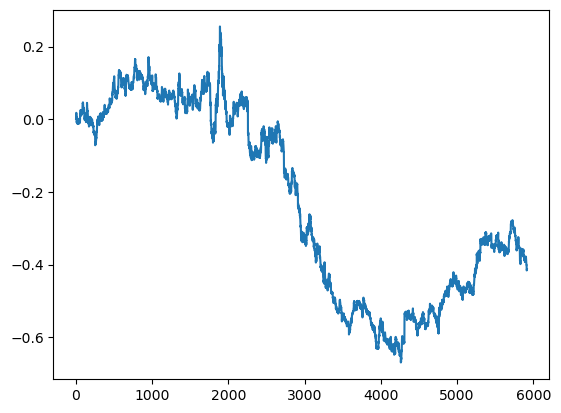

In [1276]:
# Buy when the price breaks above the upper Bollinger Band
df['buy_signal'] = df['Close'] > df['upper_band']
df.loc[df['buy_signal'] == True, 'Position'] = 1

# Sell when the price drops below the 20-day moving average
df['sell_signal'] = df['Close'] < df['ma20']
df.loc[df['sell_signal'] == True, 'Position'] = -1

# Forward fill the position column to ensure we hold onto our position 
# until a sell signal is generated
df['Position'].fillna(method='ffill', inplace=True)

# Calculate the daily returns of the strategy
df['Strategy Returns'] = df['Close'].pct_change() * df['Position'].shift(1)

# Plot the strategy returns
import matplotlib.pyplot as plt
plt.plot(df['Strategy Returns'].cumsum())
plt.show()

In [1277]:
import tapy as ta
from tapy import Indicators

i = Indicators(df)
i.fractals(column_name_high='fractal_high', column_name_low='fractal_low')
df = i.df

# Buy when the price breaks above the fractal high
df['buy_signal1'] = df['Close'] > df['fractal_high']
df.loc[df['buy_signal1'] == True, 'Position'] = 1

# Sell when the price drops below the fractal low
df['sell_signal1'] = df['Close'] < df['fractal_low']
df.loc[df['sell_signal1'] == True, 'Position'] = -1

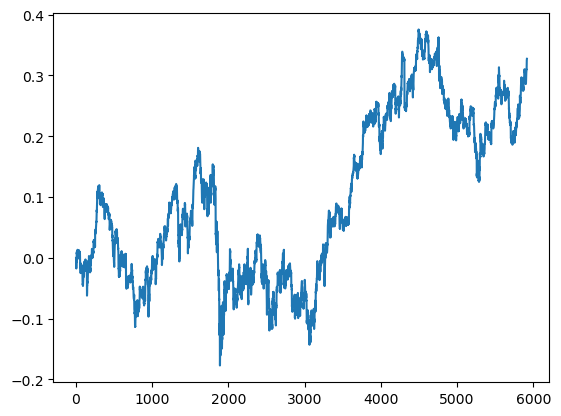

In [1278]:

# Forward fill the position column to ensure we hold onto our position until a sell signal is generated
df['Position'].fillna(method='ffill', inplace=True)

# Calculate the daily returns of the strategy
df['Strategy Returns'] = df['Close'].pct_change() * df['Position'].shift(1)

# Plot the strategy returns
import matplotlib.pyplot as plt
plt.plot(df['Strategy Returns'].cumsum())
plt.show()


In [1279]:
i = Indicators(df)
i.fractals(column_name_high='fractals_high', column_name_low='fractals_low')
df = i.df
df.tail()


,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low
5913,104.220001,104.379997,104.160004,104.260002,104.260002,57303,2024,2,21,17,...,False,1.0,False,0.000384,False,False,True,False,False,False
5914,105.000000,107.080002,104.980003,105.739998,105.739998,183223,2024,2,22,9,...,True,1.0,False,0.014195,True,False,True,False,True,False
5915,105.760002,105.980003,105.440002,105.820000,105.820000,52656,2024,2,22,10,...,True,1.0,False,0.000757,False,False,True,False,False,False
5916,105.800003,106.080002,105.660004,106.000000,106.000000,59493,2024,2,22,11,...,False,1.0,False,0.001701,False,False,True,False,False,False
5917,105.980003,106.099998,105.900002,106.080002,106.080002,5920,2024,2,22,12,...,False,1.0,False,0.000755,False,False,True,False,False,False


In [1280]:
VSignal = [0] * len(df)
vbackcandles = 1
for row in range(vbackcandles+1, len(df)):
    VSignal[row] = 1
    for i in range(row-vbackcandles, row):
        if df.Volume[row]<df.Volume[i] and df.Volume[row-1]<df.Volume[row-2]:
            VSignal[row]=0
df['VSignal']=VSignal


In [1281]:
PriceSignal = [0]*len(df)
pbackcandles = 4
for row in range(pbackcandles, len(df)):
    PriceSignal[row] = 1
    for i in range(row-pbackcandles, row):
        if df.EMASignal[row] == 1: #downtrend
            if df.Open[row]<=df.Close[row]: #downcandle row
                PriceSignal[row]=0
            elif df.Open[i]>df.Close[i]: #downcandle i we are looking for 4 upcandles
                PriceSignal[row]=0
        if df.EMASignal[row] == 2: #uptrend
            if df.Open[row]>=df.Close[row]: #upcandle row
                PriceSignal[row]=0
            elif df.Open[i]<df.Close[i]: #upcandle i we are looking for 4 dowcandles
                PriceSignal[row]=0
        else:
            PriceSignal[row] = 0

df['PriceSignal']=PriceSignal


In [1282]:
TotSignal = [0] * len(df)
for row in range(0, len(df)):
    if df.EMASignal[row]==1 and df.VSignal[row]==1 and df.PriceSignal[row]==1:
        TotSignal[row]=1
    if df.EMASignal[row]==2 and df.VSignal[row]==1 and df.PriceSignal[row]==1:
        TotSignal[row]=2

df['TotSignal']=TotSignal


In [1283]:
SLSignal = [0] * len(df)
SLbackcandles = 4
for row in range(SLbackcandles, len(df)):
    mi=1e10
    ma=-1e10
    if df.EMASignal[row]==1:
        for i in range(row-SLbackcandles, row+1):
            ma = max(ma,df.High[i])
        SLSignal[row]=ma
    if df.EMASignal[row]==2:
        for i in range(row-SLbackcandles, row+1):
            mi = min(mi,df.Low[i])
        SLSignal[row]=mi
        
df['SLSignal']=SLSignal

In [1284]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal
0,86.500000,86.559998,85.129997,85.540001,85.540001,124883,2021,4,21,9,...,False,False,True,False,False,False,0,0,0,0
1,85.449997,85.769997,85.129997,85.519997,85.519997,402717,2021,4,21,10,...,False,False,True,False,False,False,0,0,0,0
2,85.260002,85.550003,84.800003,84.809998,84.809998,273664,2021,4,21,11,...,False,False,True,False,False,False,1,0,0,0
3,85.160004,85.309998,84.660004,85.309998,85.309998,218870,2021,4,21,12,...,False,False,True,False,False,False,0,0,0,0
4,84.860001,85.349998,84.839996,84.870003,84.870003,154168,2021,4,21,13,...,False,False,True,False,False,False,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,104.220001,104.379997,104.160004,104.260002,104.260002,57303,2024,2,21,17,...,False,False,True,False,False,False,1,0,0,0
5914,105.000000,107.080002,104.980003,105.739998,105.739998,183223,2024,2,22,9,...,True,False,True,False,True,False,1,0,0,0
5915,105.760002,105.980003,105.440002,105.820000,105.820000,52656,2024,2,22,10,...,False,False,True,False,False,False,1,0,0,0
5916,105.800003,106.080002,105.660004,106.000000,106.000000,59493,2024,2,22,11,...,False,False,True,False,False,False,1,0,0,0


In [1285]:
grid_distance = 0.001
midprice = 1.08

In [1286]:
def generate_grid(midprice, grid_distance, grid_range):
    return (np.arange(midprice-grid_range, midprice+grid_range, grid_distance))

grid = generate_grid(midprice=midprice, grid_distance=grid_distance, grid_range=0.1)
grid


array([0.98 , 0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988,
       0.989, 0.99 , 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997,
       0.998, 0.999, 1.   , 1.001, 1.002, 1.003, 1.004, 1.005, 1.006,
       1.007, 1.008, 1.009, 1.01 , 1.011, 1.012, 1.013, 1.014, 1.015,
       1.016, 1.017, 1.018, 1.019, 1.02 , 1.021, 1.022, 1.023, 1.024,
       1.025, 1.026, 1.027, 1.028, 1.029, 1.03 , 1.031, 1.032, 1.033,
       1.034, 1.035, 1.036, 1.037, 1.038, 1.039, 1.04 , 1.041, 1.042,
       1.043, 1.044, 1.045, 1.046, 1.047, 1.048, 1.049, 1.05 , 1.051,
       1.052, 1.053, 1.054, 1.055, 1.056, 1.057, 1.058, 1.059, 1.06 ,
       1.061, 1.062, 1.063, 1.064, 1.065, 1.066, 1.067, 1.068, 1.069,
       1.07 , 1.071, 1.072, 1.073, 1.074, 1.075, 1.076, 1.077, 1.078,
       1.079, 1.08 , 1.081, 1.082, 1.083, 1.084, 1.085, 1.086, 1.087,
       1.088, 1.089, 1.09 , 1.091, 1.092, 1.093, 1.094, 1.095, 1.096,
       1.097, 1.098, 1.099, 1.1  , 1.101, 1.102, 1.103, 1.104, 1.105,
       1.106, 1.107,

In [1287]:
signal = [0]*len(df)
i=0
for index, row in df.iterrows():
    for p in grid:
        if min(row.Low, row.High)<p and max(row.Low, row.High)>p:
            signal[i]=1
    i+=1

In [1288]:
df["grid_signal"]=signal
df[df["grid_signal"]==1]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal


In [1289]:
df['Heiken_Close'] = (df.Open+df.Close+df.High+df.Low)/4
df['Heiken_Open'] = df['Open']
for i in range(1, len(df)):
    df['Heiken_Open'][i] = (df.Heiken_Open[i-1]+df.Heiken_Close[i-1])/2

df['Heiken_High'] = df[['High', 'Heiken_Open', 'Heiken_Close']].max(axis=1)
df['Heiken_Low'] = df[['Low', 'Heiken_Open', 'Heiken_Close']].min(axis=1)
df.head(10)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_14392\1014696069.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low
0,86.500000,86.559998,85.129997,85.540001,85.540001,124883,2021,4,21,9,...,False,0,0,0,0,0,85.932499,86.500000,86.559998,85.129997
1,85.449997,85.769997,85.129997,85.519997,85.519997,402717,2021,4,21,10,...,False,0,0,0,0,0,85.467497,86.216249,86.216249,85.129997
2,85.260002,85.550003,84.800003,84.809998,84.809998,273664,2021,4,21,11,...,False,1,0,0,0,0,85.105001,85.841873,85.841873,84.800003
3,85.160004,85.309998,84.660004,85.309998,85.309998,218870,2021,4,21,12,...,False,0,0,0,0,0,85.110001,85.473437,85.473437,84.660004
4,84.860001,85.349998,84.839996,84.870003,84.870003,154168,2021,4,21,13,...,False,0,0,0,0,0,84.980000,85.291719,85.349998,84.839996
5,85.180000,85.190002,83.910004,84.040001,84.040001,287715,2021,4,21,14,...,False,1,0,0,0,0,84.580002,85.135859,85.190002,83.910004
6,84.529999,84.690002,83.809998,84.529999,84.529999,352577,2021,4,21,15,...,False,1,0,0,0,0,84.389999,84.857931,84.857931,83.809998
7,84.050003,85.160004,83.809998,85.089996,85.089996,385124,2021,4,21,16,...,False,1,0,0,0,0,84.527500,84.623965,85.160004,83.809998
8,84.800003,85.309998,84.769997,85.260002,85.260002,272083,2021,4,21,17,...,False,1,0,0,0,0,85.035000,84.575733,85.309998,84.575733
9,85.540001,86.230003,85.150002,85.230003,85.230003,107463,2021,4,22,9,...,False,0,0,0,0,0,85.537502,84.805366,86.230003,84.805366


In [1290]:
import pandas_ta as ta

# Assuming 'df' is your DataFrame containing OHLC data

# Calculate Exponential Moving Averages (EMAs) and RSI
df["EMA20"] = ta.ema(df.Close, length=20)
df["EMA50"] = ta.ema(df.Close, length=50)
df['RSI'] = ta.rsi(df.Close, length=12)

# Fill missing values for the specified columns using backfill
columns_to_fill = ["EMA20", "EMA50", "RSI"]
df[columns_to_fill] = df[columns_to_fill].fillna(method='bfill')


In [1291]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50
0,86.500000,86.559998,85.129997,85.540001,85.540001,124883,2021,4,21,9,...,0,0,0,0,85.932499,86.500000,86.559998,85.129997,85.587000,85.927000
1,85.449997,85.769997,85.129997,85.519997,85.519997,402717,2021,4,21,10,...,0,0,0,0,85.467497,86.216249,86.216249,85.129997,85.587000,85.927000
2,85.260002,85.550003,84.800003,84.809998,84.809998,273664,2021,4,21,11,...,0,0,0,0,85.105001,85.841873,85.841873,84.800003,85.587000,85.927000
3,85.160004,85.309998,84.660004,85.309998,85.309998,218870,2021,4,21,12,...,0,0,0,0,85.110001,85.473437,85.473437,84.660004,85.587000,85.927000
4,84.860001,85.349998,84.839996,84.870003,84.870003,154168,2021,4,21,13,...,0,0,0,0,84.980000,85.291719,85.349998,84.839996,85.587000,85.927000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,104.220001,104.379997,104.160004,104.260002,104.260002,57303,2024,2,21,17,...,0,0,0,0,104.255001,103.953959,104.379997,103.953959,103.223735,102.651124
5914,105.000000,107.080002,104.980003,105.739998,105.739998,183223,2024,2,22,9,...,0,0,0,0,105.700001,104.104480,107.080002,104.104480,103.463379,102.772256
5915,105.760002,105.980003,105.440002,105.820000,105.820000,52656,2024,2,22,10,...,0,0,0,0,105.750002,104.902241,105.980003,104.902241,103.687819,102.891775
5916,105.800003,106.080002,105.660004,106.000000,106.000000,59493,2024,2,22,11,...,0,0,0,0,105.885002,105.326121,106.080002,105.326121,103.908027,103.013667


In [1292]:
import plotly.graph_objects as go
from datetime import datetime
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=df['Heiken_Open'],
                high=df['Heiken_High'],
                low=df['Heiken_Low'],
                close=df['Heiken_Close']),
                     go.Scatter(x=df.index, y=df.EMA20, line=dict(color='red', width=1), name="EMA20"),
                     go.Scatter(x=df.index, y=df.EMA50, line=dict(color='blue', width=1), name="EMA50")])

fig.show()

In [1293]:
def totalSignal(df):
    ordersignal=[0]*len(df)
    for i in range(0, len(df)):
        if (df.EMA20[i]>df.EMA50[i] and df.Heiken_Open[i]<df.EMA20[i] 
            and df.Heiken_Close[i]>df.EMA20[i]):
            ordersignal[i]=2
        if (df.EMA20[i]<df.EMA50[i] and df.Heiken_Open[i]>df.EMA20[i] 
            and df.Heiken_Close[i]<df.EMA20[i]):
            ordersignal[i]=1
    df['ordersignal']=ordersignal

totalSignal(df)

In [1294]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal
0,86.500000,86.559998,85.129997,85.540001,85.540001,124883,2021,4,21,9,...,0,0,0,85.932499,86.500000,86.559998,85.129997,85.587000,85.927000,0
1,85.449997,85.769997,85.129997,85.519997,85.519997,402717,2021,4,21,10,...,0,0,0,85.467497,86.216249,86.216249,85.129997,85.587000,85.927000,1
2,85.260002,85.550003,84.800003,84.809998,84.809998,273664,2021,4,21,11,...,0,0,0,85.105001,85.841873,85.841873,84.800003,85.587000,85.927000,1
3,85.160004,85.309998,84.660004,85.309998,85.309998,218870,2021,4,21,12,...,0,0,0,85.110001,85.473437,85.473437,84.660004,85.587000,85.927000,0
4,84.860001,85.349998,84.839996,84.870003,84.870003,154168,2021,4,21,13,...,0,0,0,84.980000,85.291719,85.349998,84.839996,85.587000,85.927000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,104.220001,104.379997,104.160004,104.260002,104.260002,57303,2024,2,21,17,...,0,0,0,104.255001,103.953959,104.379997,103.953959,103.223735,102.651124,0
5914,105.000000,107.080002,104.980003,105.739998,105.739998,183223,2024,2,22,9,...,0,0,0,105.700001,104.104480,107.080002,104.104480,103.463379,102.772256,0
5915,105.760002,105.980003,105.440002,105.820000,105.820000,52656,2024,2,22,10,...,0,0,0,105.750002,104.902241,105.980003,104.902241,103.687819,102.891775,0
5916,105.800003,106.080002,105.660004,106.000000,106.000000,59493,2024,2,22,11,...,0,0,0,105.885002,105.326121,106.080002,105.326121,103.908027,103.013667,0


In [1295]:
# StopLoss from signal
SLSignal = [0] * len(df)
SLbackcandles = 1
for row in range(SLbackcandles, len(df)):
    mi=1e10
    ma=-1e10
    if df.ordersignal[row]==1:
        for i in range(row-SLbackcandles, row+1):
            ma = max(ma,df.High[i])
        SLSignal[row]=ma
    if df.ordersignal[row]==2:
        for i in range(row-SLbackcandles, row+1):
            mi = min(mi,df.Low[i])
        SLSignal[row]=mi
        
df['SLSignal_heiken']=SLSignal# StopLoss from signal
SLSignal = [0] * len(df)
SLbackcandles = 1
for row in range(SLbackcandles, len(df)):
    mi=1e10
    ma=-1e10
    if df.ordersignal[row]==1:
        for i in range(row-SLbackcandles, row+1):
            ma = max(ma,df.High[i])
        SLSignal[row]=ma
    if df.ordersignal[row]==2:
        for i in range(row-SLbackcandles, row+1):
            mi = min(mi,df.Low[i])
        SLSignal[row]=mi
        
df['SLSignal_heiken']=SLSignal

In [1296]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken
0,86.500000,86.559998,85.129997,85.540001,85.540001,124883,2021,4,21,9,...,0,0,85.932499,86.500000,86.559998,85.129997,85.587000,85.927000,0,0.000000
1,85.449997,85.769997,85.129997,85.519997,85.519997,402717,2021,4,21,10,...,0,0,85.467497,86.216249,86.216249,85.129997,85.587000,85.927000,1,86.559998
2,85.260002,85.550003,84.800003,84.809998,84.809998,273664,2021,4,21,11,...,0,0,85.105001,85.841873,85.841873,84.800003,85.587000,85.927000,1,85.769997
3,85.160004,85.309998,84.660004,85.309998,85.309998,218870,2021,4,21,12,...,0,0,85.110001,85.473437,85.473437,84.660004,85.587000,85.927000,0,0.000000
4,84.860001,85.349998,84.839996,84.870003,84.870003,154168,2021,4,21,13,...,0,0,84.980000,85.291719,85.349998,84.839996,85.587000,85.927000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,104.220001,104.379997,104.160004,104.260002,104.260002,57303,2024,2,21,17,...,0,0,104.255001,103.953959,104.379997,103.953959,103.223735,102.651124,0,0.000000
5914,105.000000,107.080002,104.980003,105.739998,105.739998,183223,2024,2,22,9,...,0,0,105.700001,104.104480,107.080002,104.104480,103.463379,102.772256,0,0.000000
5915,105.760002,105.980003,105.440002,105.820000,105.820000,52656,2024,2,22,10,...,0,0,105.750002,104.902241,105.980003,104.902241,103.687819,102.891775,0,0.000000
5916,105.800003,106.080002,105.660004,106.000000,106.000000,59493,2024,2,22,11,...,0,0,105.885002,105.326121,106.080002,105.326121,103.908027,103.013667,0,0.000000


In [1297]:
import pandas_ta as ta

# Assuming 'df' is your DataFrame containing OHLC data

# Calculate ADX
a = ta.adx(df.High, df.Low, df.Close, length=14)

# Join ADX_14 column to the DataFrame
df = df.join(a.ADX_14)

# Fill missing values for ADX_14 column using backfill
df['ADX_14'].fillna(method='bfill', inplace=True)


In [1298]:
def addemasignal(df, backcandles):
    emasignal = [0]*len(df)
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row-backcandles, row+1):
            if df.High[i]>=df.EMA[i]:
                dnt=0
            if df.Low[i]<=df.EMA[i]:
                upt=0
        if upt==1 and dnt==1:
            #print("!!!!! check trend loop !!!!")
            emasignal[row]=3
        elif upt==1:
            emasignal[row]=2
        elif dnt==1:
            emasignal[row]=1
    df['EMASignal1'] = emasignal

addemasignal(df,6)

In [1299]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken,ADX_14,EMASignal1
0,86.500000,86.559998,85.129997,85.540001,85.540001,124883,2021,4,21,9,...,85.932499,86.500000,86.559998,85.129997,85.587000,85.927000,0,0.000000,13.893142,0
1,85.449997,85.769997,85.129997,85.519997,85.519997,402717,2021,4,21,10,...,85.467497,86.216249,86.216249,85.129997,85.587000,85.927000,1,86.559998,13.893142,0
2,85.260002,85.550003,84.800003,84.809998,84.809998,273664,2021,4,21,11,...,85.105001,85.841873,85.841873,84.800003,85.587000,85.927000,1,85.769997,13.893142,0
3,85.160004,85.309998,84.660004,85.309998,85.309998,218870,2021,4,21,12,...,85.110001,85.473437,85.473437,84.660004,85.587000,85.927000,0,0.000000,13.893142,0
4,84.860001,85.349998,84.839996,84.870003,84.870003,154168,2021,4,21,13,...,84.980000,85.291719,85.349998,84.839996,85.587000,85.927000,0,0.000000,13.893142,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,104.220001,104.379997,104.160004,104.260002,104.260002,57303,2024,2,21,17,...,104.255001,103.953959,104.379997,103.953959,103.223735,102.651124,0,0.000000,25.124619,0
5914,105.000000,107.080002,104.980003,105.739998,105.739998,183223,2024,2,22,9,...,105.700001,104.104480,107.080002,104.104480,103.463379,102.772256,0,0.000000,27.758566,0
5915,105.760002,105.980003,105.440002,105.820000,105.820000,52656,2024,2,22,10,...,105.750002,104.902241,105.980003,104.902241,103.687819,102.891775,0,0.000000,30.204373,0
5916,105.800003,106.080002,105.660004,106.000000,106.000000,59493,2024,2,22,11,...,105.885002,105.326121,106.080002,105.326121,103.908027,103.013667,0,0.000000,32.528761,0


In [1300]:
def totalSignal(df, ADX):
    ordersignal=[0]*len(df)
    for i in range(0, len(df)):
        if  df.RSI[i]<=25 and ADX[i]>=20 and df.EMASignal[i]==2:
            ordersignal[i]=2
    df['long_signal']=ordersignal

totalSignal(df, df.ADX_14)

In [1301]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken,ADX_14,EMASignal1,long_signal
0,86.500000,86.559998,85.129997,85.540001,85.540001,124883,2021,4,21,9,...,86.500000,86.559998,85.129997,85.587000,85.927000,0,0.000000,13.893142,0,0
1,85.449997,85.769997,85.129997,85.519997,85.519997,402717,2021,4,21,10,...,86.216249,86.216249,85.129997,85.587000,85.927000,1,86.559998,13.893142,0,0
2,85.260002,85.550003,84.800003,84.809998,84.809998,273664,2021,4,21,11,...,85.841873,85.841873,84.800003,85.587000,85.927000,1,85.769997,13.893142,0,0
3,85.160004,85.309998,84.660004,85.309998,85.309998,218870,2021,4,21,12,...,85.473437,85.473437,84.660004,85.587000,85.927000,0,0.000000,13.893142,0,0
4,84.860001,85.349998,84.839996,84.870003,84.870003,154168,2021,4,21,13,...,85.291719,85.349998,84.839996,85.587000,85.927000,0,0.000000,13.893142,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,104.220001,104.379997,104.160004,104.260002,104.260002,57303,2024,2,21,17,...,103.953959,104.379997,103.953959,103.223735,102.651124,0,0.000000,25.124619,0,0
5914,105.000000,107.080002,104.980003,105.739998,105.739998,183223,2024,2,22,9,...,104.104480,107.080002,104.104480,103.463379,102.772256,0,0.000000,27.758566,0,0
5915,105.760002,105.980003,105.440002,105.820000,105.820000,52656,2024,2,22,10,...,104.902241,105.980003,104.902241,103.687819,102.891775,0,0.000000,30.204373,0,0
5916,105.800003,106.080002,105.660004,106.000000,106.000000,59493,2024,2,22,11,...,105.326121,106.080002,105.326121,103.908027,103.013667,0,0.000000,32.528761,0,0


In [1302]:
import numpy as np
df['martiangle_signal'] = np.random.random(len(df))
df['martiangle_signal'] = df['martiangle_signal'].apply(lambda x: 1 if x<0.5 else 2)

In [1303]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken,ADX_14,EMASignal1,long_signal,martiangle_signal
0,86.500000,86.559998,85.129997,85.540001,85.540001,124883,2021,4,21,9,...,86.559998,85.129997,85.587000,85.927000,0,0.000000,13.893142,0,0,1
1,85.449997,85.769997,85.129997,85.519997,85.519997,402717,2021,4,21,10,...,86.216249,85.129997,85.587000,85.927000,1,86.559998,13.893142,0,0,2
2,85.260002,85.550003,84.800003,84.809998,84.809998,273664,2021,4,21,11,...,85.841873,84.800003,85.587000,85.927000,1,85.769997,13.893142,0,0,2
3,85.160004,85.309998,84.660004,85.309998,85.309998,218870,2021,4,21,12,...,85.473437,84.660004,85.587000,85.927000,0,0.000000,13.893142,0,0,1
4,84.860001,85.349998,84.839996,84.870003,84.870003,154168,2021,4,21,13,...,85.349998,84.839996,85.587000,85.927000,0,0.000000,13.893142,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,104.220001,104.379997,104.160004,104.260002,104.260002,57303,2024,2,21,17,...,104.379997,103.953959,103.223735,102.651124,0,0.000000,25.124619,0,0,2
5914,105.000000,107.080002,104.980003,105.739998,105.739998,183223,2024,2,22,9,...,107.080002,104.104480,103.463379,102.772256,0,0.000000,27.758566,0,0,2
5915,105.760002,105.980003,105.440002,105.820000,105.820000,52656,2024,2,22,10,...,105.980003,104.902241,103.687819,102.891775,0,0.000000,30.204373,0,0,1
5916,105.800003,106.080002,105.660004,106.000000,106.000000,59493,2024,2,22,11,...,106.080002,105.326121,103.908027,103.013667,0,0.000000,32.528761,0,0,1


In [1304]:
df['Trend'].fillna('4.0', inplace=True)


In [1305]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken,ADX_14,EMASignal1,long_signal,martiangle_signal
0,86.500000,86.559998,85.129997,85.540001,85.540001,124883,2021,4,21,9,...,86.559998,85.129997,85.587000,85.927000,0,0.000000,13.893142,0,0,1
1,85.449997,85.769997,85.129997,85.519997,85.519997,402717,2021,4,21,10,...,86.216249,85.129997,85.587000,85.927000,1,86.559998,13.893142,0,0,2
2,85.260002,85.550003,84.800003,84.809998,84.809998,273664,2021,4,21,11,...,85.841873,84.800003,85.587000,85.927000,1,85.769997,13.893142,0,0,2
3,85.160004,85.309998,84.660004,85.309998,85.309998,218870,2021,4,21,12,...,85.473437,84.660004,85.587000,85.927000,0,0.000000,13.893142,0,0,1
4,84.860001,85.349998,84.839996,84.870003,84.870003,154168,2021,4,21,13,...,85.349998,84.839996,85.587000,85.927000,0,0.000000,13.893142,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,104.220001,104.379997,104.160004,104.260002,104.260002,57303,2024,2,21,17,...,104.379997,103.953959,103.223735,102.651124,0,0.000000,25.124619,0,0,2
5914,105.000000,107.080002,104.980003,105.739998,105.739998,183223,2024,2,22,9,...,107.080002,104.104480,103.463379,102.772256,0,0.000000,27.758566,0,0,2
5915,105.760002,105.980003,105.440002,105.820000,105.820000,52656,2024,2,22,10,...,105.980003,104.902241,103.687819,102.891775,0,0.000000,30.204373,0,0,1
5916,105.800003,106.080002,105.660004,106.000000,106.000000,59493,2024,2,22,11,...,106.080002,105.326121,103.908027,103.013667,0,0.000000,32.528761,0,0,1


In [1306]:
df['Strategy Returns'].isna().sum()

1

In [1307]:
df['Strategy Returns'].dropna(inplace=True)

In [1308]:
df.isna().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
                    ..
SLSignal_heiken      0
ADX_14               0
EMASignal1           0
long_signal          0
martiangle_signal    0
Length: 62, dtype: int64

In [1309]:
# Assuming 'df' is your DataFrame containing OHLC data

# Calculate the difference between the current 'Close' and the previous 'Close'
df['Close_diff'] = df['Close'].diff()

# Create a new column indicating whether the candle is up or down from the previous one
df['Candle_direction'] = 'Up'  # By default, set all candles to 'Up'

# Set 'Candle_direction' to 'Down' for candles with a negative 'Close_diff'
df.loc[df['Close_diff'] < 0, 'Candle_direction'] = 'Down'

# Replace 'Up' by 1 and 'Down' by 2
df['Candle_direction'].replace({'Up': 1, 'Down': 2}, inplace=True)

# Drop the 'Close_diff' column if you don't need it anymore
df.drop(columns=['Close_diff'], inplace=True)


In [1310]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5918 entries, 0 to 5917
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open                    5918 non-null   float64
 1   High                    5918 non-null   float64
 2   Low                     5918 non-null   float64
 3   Close                   5918 non-null   float64
 4   Adj Close               5918 non-null   float64
 5   Volume                  5918 non-null   int64  
 6   Year                    5918 non-null   int64  
 7   Month                   5918 non-null   int64  
 8   Day                     5918 non-null   int64  
 9   Hour                    5918 non-null   int64  
 10  Minute                  5918 non-null   int64  
 11  RSI                     5918 non-null   float64
 12  EMA                     5918 non-null   float64
 13  EMASignal               5918 non-null   int64  
 14  isPivot                 5918 non-null   

In [1311]:
df_cleaned=df.drop(['Open','High','Low','Close','Adj Close',
                  'Volume','RSI','EMA','ma20','middle_band','upper_band'
                  ,'lower_band','Strategy Returns','Heiken_Close','Heiken_Open',
                  'Heiken_High','Heiken_Low','EMA20','EMA50','ADX_14','pointpos','Channel','Trend'],axis='columns')

In [1312]:
df_cleaned

,Year,Month,Day,Hour,Minute,EMASignal,isPivot,CHOCH_pattern_detected,fibonacci_signal,SL,...,PriceSignal,TotSignal,SLSignal,grid_signal,ordersignal,SLSignal_heiken,EMASignal1,long_signal,martiangle_signal,Candle_direction
0,2021,4,21,9,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,1,1
1,2021,4,21,10,0,0,0,0,0,0,...,0,0,0,0,1,86.559998,0,0,2,2
2,2021,4,21,11,0,0,0,0,0,0,...,0,0,0,0,1,85.769997,0,0,2,2
3,2021,4,21,12,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,1,1
4,2021,4,21,13,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,2024,2,21,17,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,2,1
5914,2024,2,22,9,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,2,1
5915,2024,2,22,10,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,1,1
5916,2024,2,22,11,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,1,1


In [1313]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5918 entries, 0 to 5917
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    5918 non-null   int64  
 1   Month                   5918 non-null   int64  
 2   Day                     5918 non-null   int64  
 3   Hour                    5918 non-null   int64  
 4   Minute                  5918 non-null   int64  
 5   EMASignal               5918 non-null   int64  
 6   isPivot                 5918 non-null   int64  
 7   CHOCH_pattern_detected  5918 non-null   int64  
 8   fibonacci_signal        5918 non-null   int64  
 9   SL                      5918 non-null   int64  
 10  TP                      5918 non-null   int64  
 11  MinSwing                5918 non-null   int64  
 12  MaxSwing                5918 non-null   int64  
 13  LBD_detected            5918 non-null   int64  
 14  LBH_detected            5918 non-null   

In [1314]:
df = df_cleaned.dropna()

In [1315]:
# Create a boolean DataFrame indicating the locations of NaN values
na_locations = df.isna()

# Get the row and column indices where NaN values occur
rows, cols = np.where(na_locations)

# Print the row and column indices of NaN values
for row, col in zip(rows, cols):
    print(f"NaN value found at row {row} and column {col}")


In [1316]:
import pandas as pd

# Assuming df is your DataFrame and 'specific_column' is the name of the column you want to modify
# Replace 'specific_column' with the actual name of your column

df_cleaned['Candle_direction'] = df_cleaned['Candle_direction'].replace(2, 0)


In [1317]:
import pandas as pd

# Convert boolean column to integer
df_cleaned['buy_signal'] = df_cleaned['buy_signal'].astype(int)
df_cleaned['sell_signal'] = df_cleaned['sell_signal'].astype(int)
df_cleaned['fractal_high'] = df_cleaned['fractal_high'].astype(int)
df_cleaned['fractal_low'] = df_cleaned['fractal_low'].astype(int)
df_cleaned['buy_signal1'] = df_cleaned['buy_signal1'].astype(int)
df_cleaned['sell_signal1'] = df_cleaned['sell_signal1'].astype(int)
df_cleaned['fractals_high'] = df_cleaned['fractals_high'].astype(int)
df_cleaned['fractals_low'] = df_cleaned['fractals_low'].astype(int)



In [1318]:
df_cleaned.to_csv("stock_market_new_updated.csv",index=False)

PermissionError: [Errno 13] Permission denied: 'stock_market_new_updated.csv'